In [3]:
GameInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/GameInfo.csv").drop(columns=["Unnamed: 0"])
MatchAwayScoreInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchAwayScoreInfo.csv").drop(columns=["Unnamed: 0"])
MatchAwayTeamInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchAwayTeamInfo.csv").drop(columns=["Unnamed: 0"])
MatchEventInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchEventInfo.csv").drop(columns=["Unnamed: 0"])
MatchHomeScoreInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchHomeScoreInfo.csv").drop(columns=["Unnamed: 0"])
MatchHomeTeamInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchHomeTeamInfo.csv").drop(columns=["Unnamed: 0"])
MatchRoundInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchRoundInfo.csv").drop(columns=["Unnamed: 0"])
MatchTimeInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchTimeInfo.csv").drop(columns=["Unnamed: 0"])
MatchSeasonInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchSeasonInfo.csv").drop(columns=["Unnamed: 0"])
MatchTournamentInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchTournamentInfo.csv").drop(columns=["Unnamed: 0"])
MatchVenueInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchVenueInfo.csv").drop(columns=["Unnamed: 0"])
MatchVotesInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/MatchVotesInfo.csv").drop(columns=["Unnamed: 0"])
OddsInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/OddsInfo.csv").drop(columns=["Unnamed: 0"])
PeriodInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/PeriodInfo.csv").drop(columns=["Unnamed: 0"])
PowerInfo = pd.read_csv("/Users/sobhansalarian/Desktop/DataAnalysis/TennisGame/TennisGame_Repository/references/CsvTables/PowerInfo.csv").drop(columns=["Unnamed: 0"])

# importing libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1- the proportion of countries represented by the top 100 tennis players



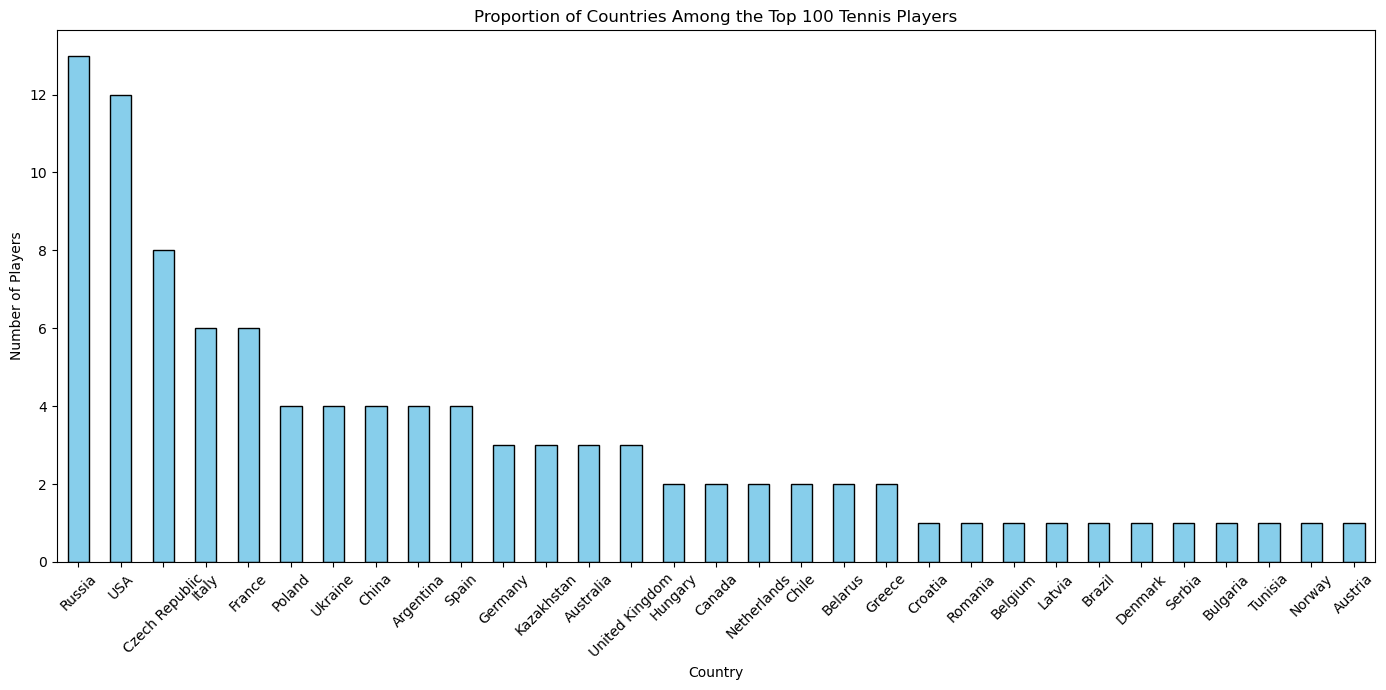

In [4]:


# Combine home and away team info to get a list of all players
players_df = pd.concat([MatchHomeTeamInfo[['player_id', 'full_name', 'current_rank', 'country']], 
                        MatchAwayTeamInfo[['player_id', 'full_name', 'current_rank', 'country']]])

# Remove duplicates and sort by rank
players_df = players_df.drop_duplicates(subset=['player_id']).sort_values(by='current_rank')

# Filter the top 100 players
top_100_players = players_df.head(100)

# Count the number of players from each country
country_counts = top_100_players['country'].value_counts()

# Plot the proportions of countries
plt.figure(figsize=(14, 7))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Proportion of Countries Among the Top 100 Tennis Players')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2- What proportion of the predictions became real ??

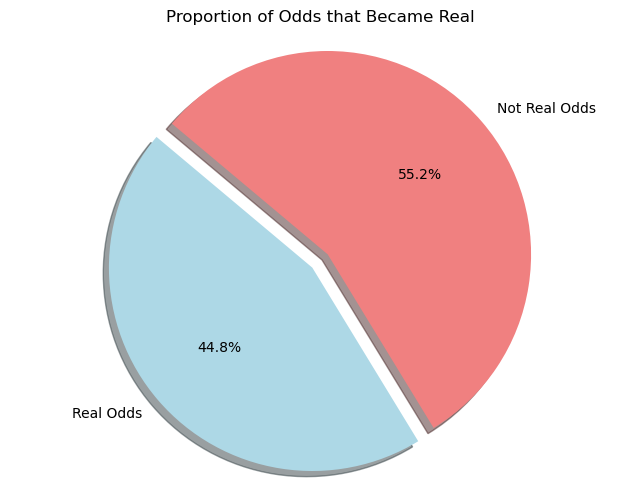

In [4]:
real_odds_count = OddsInfo['winnig'].sum()
not_real_odds_count = len(OddsInfo) - real_odds_count

# Plotting the pie chart
labels = ['Real Odds', 'Not Real Odds']
sizes = [real_odds_count, not_real_odds_count]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Real Odds)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Proportion of Odds that Became Real')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 3- analyze the relationship between players height and their current ranks

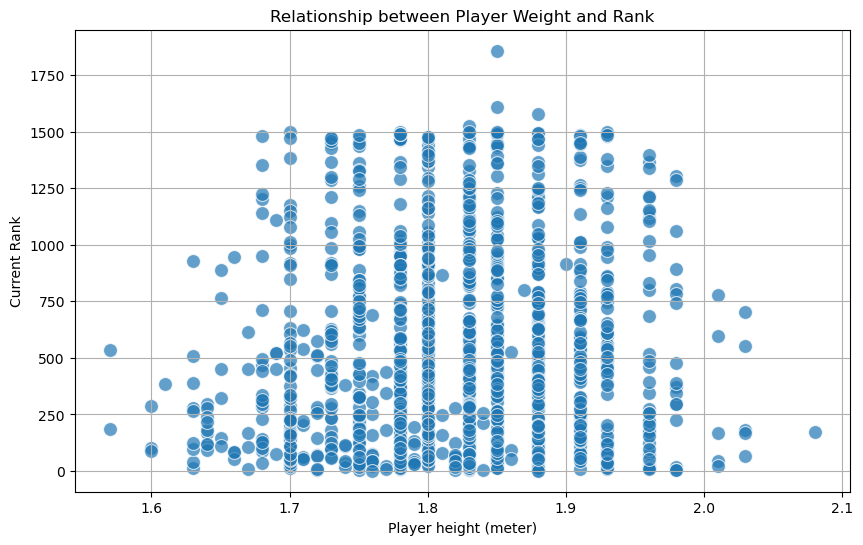

In [6]:
allplayersInfo = pd.concat([MatchAwayTeamInfo[['player_id' ,'height', 'full_name' ,'current_rank' ]] ,MatchHomeTeamInfo[['player_id' ,'height', 'full_name' ,'current_rank' ]] ])
allplayersInfo = allplayersInfo.drop_duplicates(subset=['full_name'])
allplayersInfo = allplayersInfo.dropna()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='current_rank', data=allplayersInfo, s=100, alpha=0.7)
plt.title('Relationship between Player height and Rank')
plt.xlabel('Player height (meter)')
plt.ylabel('Current Rank')
plt.grid(True)
plt.show()

# 3- What proportion of left-handed people are seen among the winners by gender?

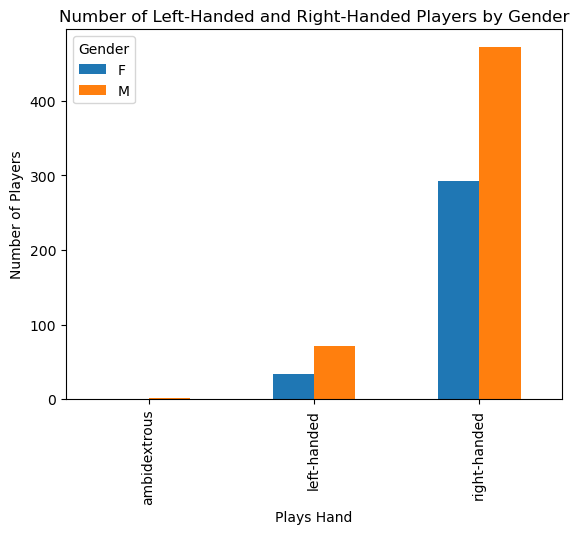

In [7]:
merged_home = pd.merge(MatchEventInfo, MatchHomeTeamInfo, on='match_id', suffixes=['_home'])
merged_away = pd.merge(MatchEventInfo, MatchAwayTeamInfo, on='match_id', suffixes=['_away'])
home_wins = merged_home[merged_home['winner_code'] == 1][['player_id', 'full_name', 'weight', 'height','country' , 'current_rank' ,'plays' , 'gender' ]].copy()
away_wins = merged_away[merged_away['winner_code'] == 2][['player_id', 'full_name', 'weight', 'height','country' , 'current_rank', 'plays' , 'gender']].copy()
allWinners = pd.concat([home_wins, away_wins])
allWinners = allWinners.drop_duplicates(subset=['player_id']).sort_values(by='current_rank')

hand_gender_counts = allWinners.groupby(['plays', 'gender']).size().unstack(fill_value=0)

# Plotting
hand_gender_counts.plot(kind='bar', stacked=False)

# Adding labels and title
plt.xlabel('Plays Hand')
plt.ylabel('Number of Players')
plt.title('Number of Left-Handed and Right-Handed Players by Gender')
plt.legend(title='Gender')

# Display the plot
plt.show()

# 4- Performance of players in different rounds by gender

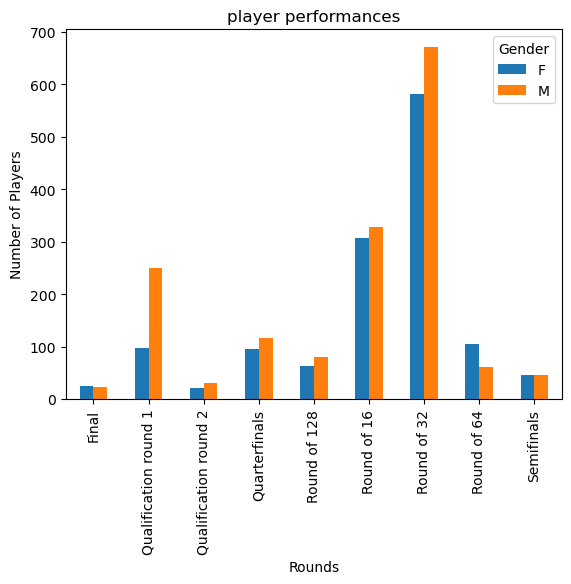

In [9]:
merged_home = pd.merge(MatchEventInfo, MatchHomeTeamInfo, on='match_id', suffixes=['_home'])
merged_away = pd.merge(MatchEventInfo, MatchAwayTeamInfo, on='match_id', suffixes=['_away'])
home_wins = merged_home[merged_home['winner_code'] == 1][['match_id','player_id', 'full_name', 'weight', 'height','country' , 'current_rank' ,'plays' , 'gender' ]].copy()
away_wins = merged_away[merged_away['winner_code'] == 2][['match_id','player_id', 'full_name', 'weight', 'height','country' , 'current_rank', 'plays' , 'gender']].copy()
allWinners = pd.concat([home_wins, away_wins])
allWinners = allWinners.drop_duplicates(subset=['player_id']).sort_values(by='current_rank')
winners_with_rounds= pd.merge(allWinners , MatchRoundInfo[[ 'match_id', 'name']], on='match_id')


hand_gender_counts = winners_with_rounds.groupby(['name', 'gender']).size().unstack(fill_value=0)
# Plotting
hand_gender_counts.plot(kind='bar', stacked=False)

# Adding labels and title
plt.xlabel('Rounds')
plt.ylabel('Number of Players')
plt.title('player performances')
plt.legend(title='Gender')
plt.show()

# what tournaments were being held in each host country ??

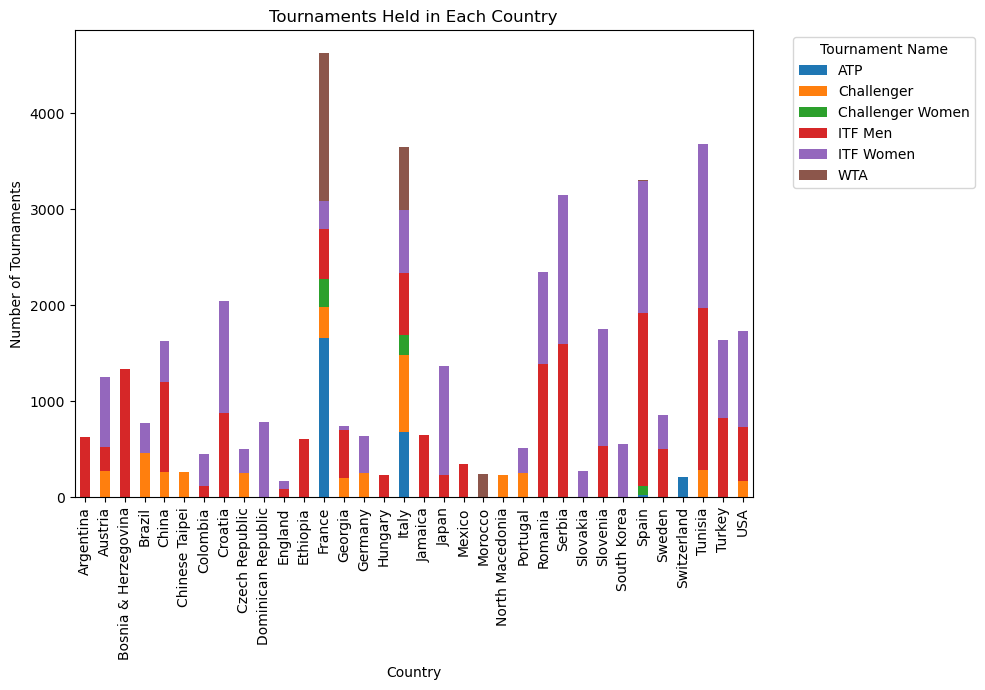

In [4]:
Countries_with_Tournaments = pd.merge( MatchVenueInfo[['match_id' , 'country']] , MatchTournamentInfo[['match_id','tournament_category_name']] ,  on='match_id')
Countries_with_Tournaments.columns
tournament_counts = Countries_with_Tournaments.groupby(['country', 'tournament_category_name']).size().unstack(fill_value=0)

# Plotting
tournament_counts.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Tournaments Held in Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Tournaments')
plt.legend(title='Tournament Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()